# Pybrain Tutorial (Haohan Shi)
## Introduction

[PyBrain](http://pybrain.org/docs/index.html) is a modular Machine Learning Library for Python. Its goal is to offer flexible, easy-to-use yet still powerful algorithms for Machine Learning Tasks and a variety of predefined environments to test and compare your algorithms.

PyBrain is short for Python-Based Reinforcement Learning, Artificial Intelligence and Neural Network Library. Emphasizing both sequential and non-sequential data and tasks, PyBrain implements many recent learning algorithms and architectures ranging from areas such as supervised learning and reinforcement learning to direct search / optimization and evolutionary methods.


## Tutorial content

In this tutorial, we will show how to do some basic operation using Pybrain

We will cover the following topics in this tutorial:
+ [Installation](#Installation)
+ [Overview](#Overview)
+ [Quickstart](#Quickstart)
 - [Build a network](#1.-Build-a-network)
 - [Build a dataset](#2.-Build-a-dataset)
 - [A very simple training example](#3.-A-very-simple-training-example)
+ [Classification with Feed-Forward Neural Networks Example](#Classification-with-Feed-Forward-Neural-Networks-Example)
+ [Summary and References](#Summary-and-references)

---

## Installation



If you want to clone the PyBrain repository to get the latest version of PyBrain, you can do so by using this command (you need to have git installed on your system) on terminal:

> $ git clone git://github.com/pybrain/pybrain.git

Then change the directory to the source code of Pybrain and run in terminal:

#### Python 2

> python setup.py install

#### Python 3

> python3 setup.py install

## Overview

PyBrain’s concept is to encapsulate different data processing algorithms in what we call a Module. A minimal Module contains a forward implementation depending on a collection of free parameters that can be adjusted, usually through some machine learning algorithm.

They are assembled into objects of the class Network and are connected via Connection objects. These may contain a number of adjustable parameters themselves, such as weights.

<img src="http://pybrain.org/docs/_images/dataprocessing_flowchart.jpg">

## Quickstart


### 1. Build a network

In PyBrain, networks are composed of `Modules` which are connected with `Connections`. You can think of a network as a directed acyclic graph, where the nodes are `Modules` and the edges are `Connections`. This makes PyBrain very flexible but it is also not necessary in all cases.

For simplicity of this tutorial, we will not cover information about how to custom a `Network` usinng `Modules` and `Connections`, you can find more detailed example [here](http://pybrain.org/docs/tutorial/netmodcon.html). There is a simple way to create networks, which is the `buildNetwork` shortcut provided by `pybrain.tools`:

In [ ]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 3, 1)

This call returns a network that has 2 inputs, 3 hidden and 1 single output neuron. In PyBrain, these layers are `Module` objects and they are already connected with `FullConnection` objects.

The net is already initialized with random values - we can already calculate its output by given two inputs through a tuple or an array:

In [ ]:
print net.activate([1, 1])
# (random) array([-1.82107117])
print net.activate((3,2))
# (random) array([-1.5885086])

We can also check the input, output and hidden layers class type:

In [ ]:
print net["in"]
print net["out"]
print net["hidden0"]

Of course, we want more flexibility when building up networks. For instance, the hidden layer is constructed with the sigmoid squashing function by default: but in a lot of cases, this is not what we want. We can also supply different types of layers:

In [ ]:
from pybrain.structure import TanhLayer
net = buildNetwork(2, 3, 1, hiddenclass=TanhLayer)
print net["in"]
print net["out"]
print net['hidden0']

from pybrain.structure import SoftmaxLayer
net = buildNetwork(2, 3, 2, hiddenclass=TanhLayer, outclass=SoftmaxLayer)
print net["in"]
print net["out"]
print net['hidden0']

### 2. Build a dataset

In order for our networks to learn anything, we need a dataset that contains inputs and targets.

The `SupervisedDataSet` class is used for standard supervised learning. It supports input and target values, whose size we have to specify on object creation, below we construct a dataset that supports two dimensional inputs and one dimensional targets:

In [ ]:
from pybrain.datasets import SupervisedDataSet
ds = SupervisedDataSet(2, 1)

#Add samples
ds.addSample((0, 0), (0,))
ds.addSample((0, 1), (1,))
ds.addSample((1, 0), (1,))
ds.addSample((1, 1), (0,))

We now have a dataset that has 4 samples in it. We can check that with python’s idiomatic way of checking the size, and other features:

In [ ]:
#length of the dataset
print len(ds)
# 4

#input of the dataset
print ds['input']
# array([[ 0.,  0.],
#        [ 0.,  1.],
#        [ 1.,  0.],
#        [ 1.,  1.]])

#target of the inputs
print ds['target']
# array([[ 0.],
#        [ 1.],
#        [ 1.],
#        [ 0.]])

#iterate over the dataset
for inpt, target in ds:
    print inpt, target

# [ 0.  0.] [ 0.]
# [ 0.  1.] [ 1.]
# [ 1.  0.] [ 1.]
# [ 1.  1.] [ 0.]

#clear all the data
ds.clear()
print ds['input']
# array([], shape=(0, 2), dtype=float64)
print ds['target']
# array([], shape=(0, 1), dtype=float64)

### 3. A very simple training example

For adjusting parameters of modules in supervised learning, PyBrain has the concept of trainers. Trainers take a module and a dataset in order to train the module to fit the data in the dataset.

Below is an example of ADD operation using `backpropagation`:

In [ ]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

First we need to build a `RecurrentNetwork` with 4 hidden nodes (default is `SigmoidLayer`, for more information about `Layer`, pybrain structral `Modules`, click [here](http://pybrain.org/docs/api/structure/modules.html?pybrain.structure.modules.SoftmaxLayer)), a class that implements networks which can work with sequential data:

In [ ]:
net = buildNetwork(2, 4, 1, recurrent = True)

Then we need to create a `SupervisedDataSet` for training:

In [ ]:
addTrain = SupervisedDataSet(2, 1)

Add some data into `SupervisedDataSet`:

In [ ]:
addTrain.addSample((0, 0), (0,))
addTrain.addSample((0, 1), (1,))
addTrain.addSample((1, 0), (1,))
addTrain.addSample((1, 1), (2,))
addTrain.addSample((0, 2), (2,))
addTrain.addSample((2, 0), (2,))
addTrain.addSample((3, 1), (4,))
addTrain.addSample((2, 2), (4,))
print addTrain

Create a `BackpropTrainer` based on the network and train dataset, `BackpropTrainer` trains the parameters of a module according to a supervised dataset (potentially sequential) by backpropagating the errors (through time), for more information about `BackpropTrainer`, click [here](http://pybrain.org/docs/api/supervised/trainers.html?pybrain.supervised.trainers.BackpropTrainer):

In [ ]:
# Train the network using arguments for learningrate and momentum
trainer = BackpropTrainer(net, addTrain, learningrate = 0.01, momentum = 0.99, verbose = True)

# Train the trainer multiple times
# If you are running in the terminal, the error will be printed each time the training completes
for epoch in range(10):
    trainer.train()
    
# test the training result
trainer.testOnData(addTrain, verbose = True)


To show the differences, we can try training the trainer using different training epochs:

In [ ]:
for epoch in range(100):
    trainer.train()

trainer.testOnData(addTrain, verbose = True)


## Classification with Feed-Forward Neural Networks Example

In the following example, we will use the knowledge above to walks through the process of setting up a dataset for classification, and train a network on it while visualizing the results.
Here are some tools we need from pybrain:

In [5]:
from pybrain.datasets            import ClassificationDataSet  # dataset specific for classification
from pybrain.utilities           import percentError  # percentage error
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer

For the purpose of result visualization, we need some extra tools from `Scipy`, `Pylab` and `Numpy`:

In [2]:
from pylab import ion, ioff, figure, draw, contourf, clf, show, hold, plot
from scipy import diag, arange, meshgrid, where
from numpy.random import multivariate_normal

In order to have a nice data visualization, the method we use here is to produce three groups of 2D points using `Numpy` `multivariate_normal` [function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html), which gives random samples from a multivariate normal distribution. Such a distribution is specified by its mean and covariance matrix. Then we store these sample points into pybrain `ClassificationDataSet`, as we can see below:

In [16]:
# mean matrix
means = [(-1,0),(2,4),(3,1)]
# covariance matrix
cov = [diag([1,1]), diag([0.5,1.2]), diag([1.5,0.7])]
# ClassificationDataSet with 2 inputs, 1 target and total of 3 classes
alldata = ClassificationDataSet(2, 1, nb_classes=3)
# generate 1200 points, 400 for each group
for n in xrange(400):
    for klass in range(3):
        input = multivariate_normal(means[klass],cov[klass])
        alldata.addSample(input, [klass])

We know from class that we need to split the set into two parts, one for training and one for validation. Here we split the dataset into 75% training and 25% test data sets. Due to an unknown bug in current pybrain version, the `splitWithProportion` function will give two results that have incorrect type, i.e. the result will not be `ClassificationDataSet`, thus we need one extra step:

In [17]:
tstdata_temp, trndata_temp = alldata.splitWithProportion(0.25)
# test dataset
tstdata = ClassificationDataSet(2, 1, nb_classes=3)
for n in xrange(0, tstdata_temp.getLength()):
    tstdata.addSample( tstdata_temp.getSample(n)[0], tstdata_temp.getSample(n)[1] )
# training dataset
trndata = ClassificationDataSet(2, 1, nb_classes=3)
for n in xrange(0, trndata_temp.getLength()):
    trndata.addSample( trndata_temp.getSample(n)[0], trndata_temp.getSample(n)[1] )

For neural network classification, it is highly advisable to encode classes with one output neuron per class. In this example, they will be labeled as 0, 1 or 2. Just like the "label" coloum in our homework pandas dataframe, we can achieve this by `_convertToOneOfMany` function, which is builtin in `ClassificationDataSet`:

In [18]:
print tstdata["class"]
print trndata["class"]
trndata._convertToOneOfMany( )
tstdata._convertToOneOfMany( )
print tstdata["class"][:5]
print trndata["class"][:5]

[]
[]
[[2]
 [2]
 [2]
 [1]
 [0]]
[[0]
 [0]
 [2]
 [1]
 [2]]


Now we can get some important values that we are interested in:

In [20]:
print "Number of training patterns: ", len(trndata)
print "Input and output dimensions: ", trndata.indim, trndata.outdim
print "First three samples (input, target, class):"
print trndata['input'][0], trndata['target'][0], trndata['class'][0]
print trndata['input'][1], trndata['target'][1], trndata['class'][1]
print trndata['input'][2], trndata['target'][2], trndata['class'][2]

Number of training patterns:  900
Input and output dimensions:  2 3
First three samples (input, target, class):
[-0.14879279 -1.35804952] [1 0 0] [0]
[-2.07764577  0.88994707] [1 0 0] [0]
[ 2.41629321  2.19831848] [0 0 1] [2]


Here comes the actual classification part. First we need to build a network which has 5 hidden units, the input and output layer size must match the dataset’s input and target dimension, we can add additional hidden layers by inserting more numbers giving the desired layer sizes. Since we are doing classification here, we need the output layer to use a softmax function:

In [21]:
fnn = buildNetwork( trndata.indim, 5, trndata.outdim, outclass=SoftmaxLayer )

Also we need to set up a trainer that basically takes the network and training dataset as input.

In [22]:
trainer = BackpropTrainer( fnn, dataset=trndata, momentum=0.1, verbose=True, weightdecay=0.01)

For visualization purpose, we need an extra square grid of data points, which we can then classify to obtain a nice contour field for visualization.

In [23]:
ticks = arange(-3.,6.,0.2)
X, Y = meshgrid(ticks, ticks)
griddata = ClassificationDataSet(2,1, nb_classes=3)
for i in xrange(X.size):
    # need column vectors in dataset, not arrays
    griddata.addSample([X.ravel()[i],Y.ravel()[i]], [0])
griddata._convertToOneOfMany()

Start the training iteration, for visualization purpose, we choose 1 as training epoch:

In [24]:
for i in range(20):
    trainer.trainEpochs(1)
    # percet error on training set
    trnresult = percentError( trainer.testOnClassData(),trndata['class'] )
    # percet error on test set
    tstresult = percentError( trainer.testOnClassData( dataset=tstdata ), tstdata['class'] )

    print "epoch: %4d" % trainer.totalepochs, \
          "  train error: %5.2f%%" % trnresult, \
          "  test error: %5.2f%%" % tstresult
            
    # The following is for plot and visualization purpose
    # get the classification of grid data
    out = fnn.activateOnDataset(griddata)
    out = out.argmax(axis=1)
    out = out.reshape(X.shape)
    figure(1)
    ioff()  # interactive graphics off
    clf()   # clear the plot
    hold(True) # overplot on
    for c in [0,1,2]:
        here, _ = where(tstdata['class']==c)
        plot(tstdata['input'][here,0],tstdata['input'][here,1],'o')
    if out.max()!=out.min():  # safety check against flat field
        contourf(X, Y, out)   # plot the contour
    ion()   # interactive graphics on
    draw()  # update the plot

Total error:  0.0560023861375
epoch:    1   train error:  5.44%   test error:  6.00%
Total error:  0.0298676956811
epoch:    2   train error:  5.44%   test error:  6.67%
Total error:  0.0214528567064
epoch:    3   train error:  5.89%   test error:  6.33%
Total error:  0.018849475712
epoch:    4   train error:  6.00%   test error:  7.00%
Total error:  0.0179388087714
epoch:    5   train error:  5.89%   test error:  6.67%
Total error:  0.0175819920173
epoch:    6   train error:  5.89%   test error:  6.67%
Total error:  0.0173262223326
epoch:    7   train error:  6.44%   test error:  7.00%
Total error:  0.017252306597
epoch:    8   train error:  5.89%   test error:  6.67%
Total error:  0.0171752615486
epoch:    9   train error:  6.56%   test error:  6.67%
Total error:  0.017073187196
epoch:   10   train error:  6.11%   test error:  6.67%
Total error:  0.0168568247367
epoch:   11   train error:  5.89%   test error:  6.67%
Total error:  0.0171498909191
epoch:   12   train error:  5.89%   te

At last, show the plot:

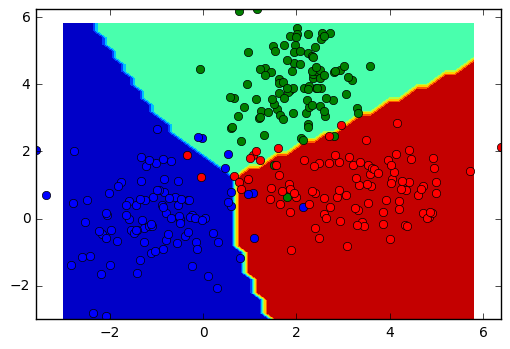

In [25]:
ioff()
show()

From the plot above we can see clearly that there are roughly three groups of data points, around (-1,0),(2,4),(3,1), and the Feed-Forward Neural Networks successfully classify them into three parts around these three points as desired.

## Summary and references

This tutorial gives a glimpse of how to use this powerful PyBrain library. PyBrain has lots of pre-solved functions and models for effectively building your network and training. During the process of making this tutorial, I've leart a lot about neural network, statistical distribution and machine learning algorithm. As a sophomore students, due to the lack of machine learning background, I only studied and learnt a very small part of the whole PyBrain library. Much more details are available from the links in the main text and as follows:

1. PyBrain documentation: http://pybrain.org/docs/index.html
2. Random Sampling: https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.random.html
3. Multivariate normal distribution: https://en.wikipedia.org/wiki/Multivariate_normal_distribution